In [7]:
import pandas as pd
# Load CSV file
stock_data = pd.read_csv(r'D:\PCDTA\Learning\ADY201m\all_stocks_5yr.csv')

In [12]:
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
stock_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [16]:
stock_data = stock_data.dropna()  # or fill missing values

In [22]:
print(stock_data.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [24]:
stock_data.columns = stock_data.columns.str.strip()

In [26]:
print(stock_data.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [30]:
stock_data.rename(columns={'date': 'Date'}, inplace=True)

In [32]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [36]:
stock_data.rename(columns={
    'open': 'Open',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'volume': 'Volume'
}, inplace=True)

In [38]:
stock_data = stock_data[['Date', 'Open', 'Close', 'High', 'Low', 'Volume']]

In [40]:
stock_data.describe()

,Date,Open,Close,High,Low,Volume
count,619029,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,2015-08-18 00:45:31.033280,83.023334,83.043305,83.778419,82.256200,4.321892e+06
min,2013-02-08 00:00:00,1.620000,1.590000,1.690000,1.500000,1.010000e+02
25%,2014-05-20 00:00:00,40.220000,40.240800,40.620000,39.830000,1.070351e+06
50%,2015-08-21 00:00:00,62.590000,62.620000,63.150000,62.020000,2.082165e+06
75%,2016-11-15 00:00:00,94.370000,94.410000,95.180000,93.540000,4.284550e+06
max,2018-02-07 00:00:00,2044.000000,2049.000000,2067.990000,2035.110000,6.182376e+08
std,NaN,97.378769,97.388913,98.207735,96.507634,8.693671e+06


In [42]:
stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=20).mean()

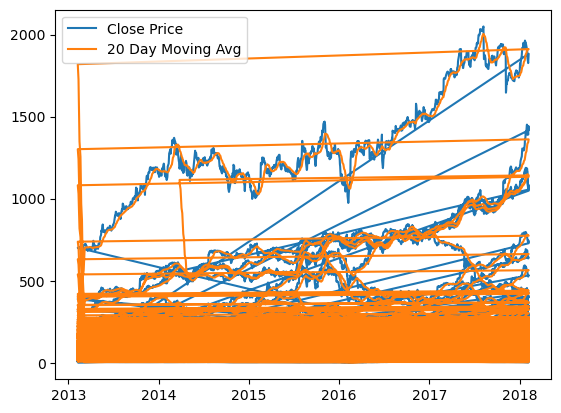

In [44]:
import matplotlib.pyplot as plt

plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['Moving_Avg'], label='20 Day Moving Avg')
plt.legend()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)